In [1]:
import pandas as pd
import logging

# Log fayl manzili
log_path = r"C:\Users\Rasulbek907\Desktop\Project_MP\Log\data_loader.log"

# Log sozlamalari
logging.basicConfig(
    filename=log_path,
    filemode='a',  # Append mode
    format='%(asctime)s - %(levelname)s - %(message)s',
    level=logging.INFO
)

try:
    logging.info("CSV fayl o'qilmoqda:...")
    df = pd.read_csv(r"C:\Users\Rasulbek907\Desktop\Project_MP\Data\Sampling_Data\Sampling_SMOTE.csv")
    logging.info(f"Fayl muvaffaqiyatli o'qildi. Satırlar soni: {len(df)} ustunlar soni: {len(df.columns)}")
except Exception as e:
    logging.error(f"CSV faylni o'qishda xatolik: {e}")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13120 entries, 0 to 13119
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           13120 non-null  int64  
 1   Unnamed: 0             13120 non-null  int64  
 2   name_length            13120 non-null  float64
 3   is_organic             13120 non-null  float64
 4   quantity_value         13120 non-null  float64
 5   quantity_unit_encoded  13120 non-null  float64
 6   category_depth         13120 non-null  float64
 7   country_count          13120 non-null  float64
 8   product_age_days       13120 non-null  float64
 9   created_month          13120 non-null  float64
 10  main_category_encoded  13120 non-null  float64
 11  nova_group             13120 non-null  int64  
dtypes: float64(9), int64(3)
memory usage: 1.2 MB


# 💡 Xulosa 

### 🧾 SMOTE natijasini tahlil

- Asl dataset hajmi: 4,993 ta namunalar
- Eng katta sinf (class 4): 2,624 ta
- Eng kichik sinf (class 2): 212 ta
- SMOTE har bir sinfni 2,624 taga tenglashtirgan
- Natijada yangi dataset hajmi: 13,120 ta

➡️ Ya’ni, SMOTE **minor sinflarni ko‘paytirib** ma’lumotni balansladi.


In [3]:
x=df.drop('nova_group',axis=1)
y=df['nova_group']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

✅ Accuracy: 1.0000

📊 Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       531
           2       1.00      1.00      1.00       515
           3       1.00      1.00      1.00       522
           4       1.00      1.00      1.00       528
           5       1.00      1.00      1.00       528

    accuracy                           1.00      2624
   macro avg       1.00      1.00      1.00      2624
weighted avg       1.00      1.00      1.00      2624



c:\Users\Rasulbek907\Desktop\Project_MP\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


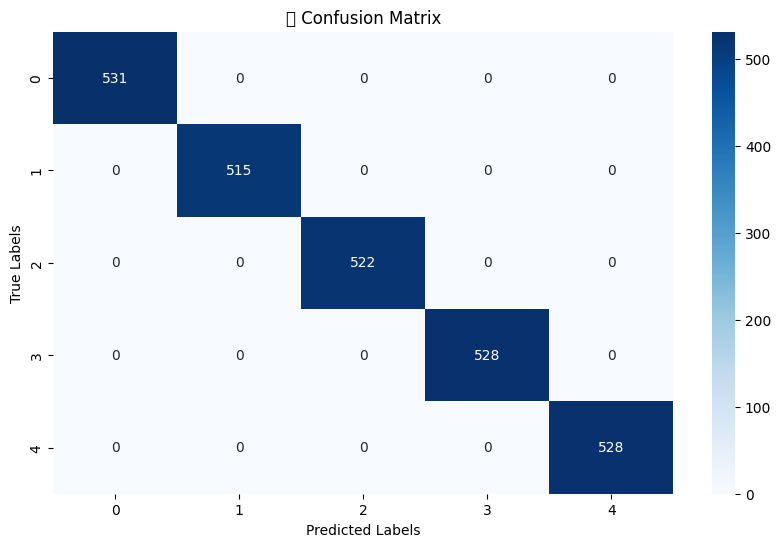

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 1. Ma'lumotlarni ajratish
X = df.select_dtypes(include=['int64', 'float64'])
y_raw = df["nova_group"]

# 🔹 2. Label encoding (agar target matnli bo‘lsa)
le = LabelEncoder()
y = le.fit_transform(y_raw)

# 🔹 3. Train-test bo‘lish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 4. One-vs-Rest model
ovr_model = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
ovr_model.fit(X_train, y_train)

# 🔹 5. Bashorat
y_pred = ovr_model.predict(X_test)

# 🔹 6. Baholash
acc = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {acc:.4f}")

# 🔹 7. Klassifikatsiya hisobot
# Agar `le.classes_` raqam bo‘lsa — ularni string ga aylantiramiz:
target_names = [str(c) for c in le.classes_]

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# 🔹 8. Confusion matrix (vizual)
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("📉 Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# OvR + RandomForestClassifier

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

# ✅ To‘g‘ri variant
ovr_model = OneVsRestClassifier(RandomForestClassifier(
    n_estimators=100,      # Daraxtlar soni
    random_state=42
))

# Modelni o‘qitish
ovr_model.fit(X_train, y_train)

# Bashorat
y_pred_ovr = ovr_model.predict(X_test)

# Baholash
print("=== One-vs-Rest (OvR) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_ovr))

=== One-vs-Rest (OvR) ===
Accuracy: 1.0


In [14]:
# Butun X uchun bashorat
y_pred_full = ovr_model.predict(X)

# DataFrame yaratish
full_df = X.copy()
full_df['y_true'] = y
full_df['y_pred_ovr'] = y_pred_full

# Saqlash
file_path_full = r"C:\Users\Rasulbek907\Desktop\Project_MP\Data\Ovo\RanFor_OVR_FULLDATA.csv"
full_df.to_csv(file_path_full, index=False)

print(f"✅ To‘liq dataset (train+test) natijalari saqlandi:\n{file_path_full}")


✅ To‘liq dataset (train+test) natijalari saqlandi:
C:\Users\Rasulbek907\Desktop\Project_MP\Data\Ovo\RanFor_OVR_FULLDATA.csv


# OvR + DecisionTreeClassifier

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

# OvR modeli
ovr_model_dt = OneVsRestClassifier(DecisionTreeClassifier(
    criterion='gini',      # 'entropy' ham bo‘lishi mumkin
    max_depth=None,        # Daraxt chuqurligi (None = cheklanmagan)
    random_state=42
))

# Modelni o‘qitish
ovr_model_dt.fit(X_train, y_train)

# Bashorat
y_pred_dt = ovr_model_dt.predict(X_test)

# Baholash
print("=== One-vs-Rest (Decision Tree) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))


=== One-vs-Rest (Decision Tree) ===
Accuracy: 1.0


In [21]:
import pandas as pd

# Natijalarni DataFrame ko‘rinishida birlashtiramiz
ovr_results = pd.DataFrame({
    'y_test': y_test,
    'y_pred_ovr': y_pred_dt
})

# CSV fayl sifatida saqlash yo‘li
save_path = r"C:\Users\Rasulbek907\Desktop\Project_MP\Data\Ovo\ovr_DeTreeClas.csv"

# Saqlash
ovr_results.to_csv(save_path, index=False)

print(f"OvR natijalari CSV faylga saqlandi:\n{save_path}")

OvR natijalari CSV faylga saqlandi:
C:\Users\Rasulbek907\Desktop\Project_MP\Data\Ovo\ovr_DeTreeClas.csv


# OvR + LogisticRegression

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

# OvR modeli
ovr_model_lr = OneVsRestClassifier(LogisticRegression(
    max_iter=1000,       # Iteratsiyalar soni (konvergentsiya uchun)
    solver='lbfgs',      # Yaxshi umumiy variant
    random_state=42
))

# Modelni o‘qitish
ovr_model_lr.fit(X_train, y_train)

# Bashorat
y_pred_lr = ovr_model_lr.predict(X_test)

# Baholash
print("=== One-vs-Rest (Logistic Regression) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))


=== One-vs-Rest (Logistic Regression) ===
Accuracy: 0.881859756097561


In [22]:
import pandas as pd

# Natijalarni DataFrame ko‘rinishida birlashtiramiz
ovr_results = pd.DataFrame({
    'y_test': y_test,
    'y_pred_ovr': y_pred_lr
})

# CSV fayl sifatida saqlash yo‘li
save_path = r"C:\Users\Rasulbek907\Desktop\Project_MP\Data\Ovo\ovr_LoReg.csv"

# Saqlash
ovr_results.to_csv(save_path, index=False)

print(f"OvR natijalari CSV faylga saqlandi:\n{save_path}")

OvR natijalari CSV faylga saqlandi:
C:\Users\Rasulbek907\Desktop\Project_MP\Data\Ovo\ovr_LoReg.csv


# OvR + XGBClassifier

In [11]:
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

# OvR modeli
ovr_model_xgb = OneVsRestClassifier(XGBClassifier(
    n_estimators=100,       # Daraxtlar soni
    learning_rate=0.1,      # O‘rganish tezligi
    max_depth=6,            # Daraxt chuqurligi
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'  # Ko‘p sinfli log-loss
))

# Modelni o‘qitish
ovr_model_xgb.fit(X_train, y_train)

# Bashorat
y_pred_xgb = ovr_model_xgb.predict(X_test)

# Baholash
print("=== One-vs-Rest (XGBoost) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))


c:\Users\Rasulbek907\Desktop\Project_MP\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [15:03:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Rasulbek907\Desktop\Project_MP\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [15:03:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Rasulbek907\Desktop\Project_MP\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [15:03:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== One-vs-Rest (XGBoost) ===
Accuracy: 1.0


c:\Users\Rasulbek907\Desktop\Project_MP\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [15:03:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Rasulbek907\Desktop\Project_MP\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [15:03:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [23]:
import pandas as pd

# Natijalarni DataFrame ko‘rinishida birlashtiramiz
ovr_results = pd.DataFrame({
    'y_test': y_test,
    'y_pred_ovr': y_pred_xgb
})

# CSV fayl sifatida saqlash yo‘li
save_path = r"C:\Users\Rasulbek907\Desktop\Project_MP\Data\Ovo\ovr_XGBCLas.csv"

# Saqlash
ovr_results.to_csv(save_path, index=False)

print(f"OvR natijalari CSV faylga saqlandi:\n{save_path}")

OvR natijalari CSV faylga saqlandi:
C:\Users\Rasulbek907\Desktop\Project_MP\Data\Ovo\ovr_XGBCLas.csv


# OvO + RandomForestClassifier

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score


ovo_model = OneVsOneClassifier(RandomForestClassifier(
    n_estimators=100,      # Daraxtlar soni
    random_state=42
))

ovo_model.fit(X_train, y_train)
y_pred_ovo = ovo_model.predict(X_test)
print("=== One-vs-One (OvO) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_ovo))


=== One-vs-One (OvO) ===
Accuracy: 1.0


In [11]:
import pandas as pd

# 1️⃣ X_test’ni DataFrame holatiga keltiramiz
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# 2️⃣ y_test va y_pred_ovo ni qo‘shamiz (to‘g‘rilangan)
X_test_df['y_test'] = y_test
X_test_df['y_pred_ovo'] = y_pred_ovo

# 3️⃣ CSV fayl sifatida saqlaymiz
save_path = r"C:\Users\Rasulbek907\Desktop\Project_MP\Data\Ovo\RanFor_OVO.csv"
X_test_df.to_csv(save_path, index=False)

print(f"✅ Butun test to‘plami va natijalar saqlandi:\n{save_path}")


✅ Butun test to‘plami va natijalar saqlandi:
C:\Users\Rasulbek907\Desktop\Project_MP\Data\Ovo\RanFor_OVO.csv


In [16]:
import pandas as pd
import os

# 1️⃣ X_test’ni DataFrame ko‘rinishiga keltiramiz
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# 2️⃣ Haqiqiy va bashorat qiymatlarni qo‘shamiz
X_test_df['y_true'] = y_test
X_test_df['y_pred_ovo'] = y_pred_ovo

# 3️⃣ Saqlash manzilini belgilaymiz
save_path = r"C:\Users\Rasulbek907\Desktop\Project_MP\Data\Ovo"

# 4️⃣ Papkani yaratamiz (agar mavjud bo‘lmasa)
os.makedirs(save_path, exist_ok=True)

# 5️⃣ CSV faylni saqlaymiz
file_path = os.path.join(save_path, "RanFor_OVO_FULLDATA.csv")
X_test_df.to_csv(file_path, index=False)

print(f"✅ OvO natijalari to‘liq saqlandi:\n{file_path}")


✅ OvO natijalari to‘liq saqlandi:
C:\Users\Rasulbek907\Desktop\Project_MP\Data\Ovo\RanFor_OVO_FULLDATA.csv


# OvO + DecisionTreeClassifier

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score

# OvO modeli
ovo_model_dt = OneVsOneClassifier(DecisionTreeClassifier(
    criterion='gini',     # 'entropy' ham bo'lishi mumkin
    max_depth=None,       # Daraxt chuqurligi (None = cheklanmagan)
    random_state=42
))

# Modelni o‘qitish
ovo_model_dt.fit(X_train, y_train)

# Bashorat
y_pred_dt = ovo_model_dt.predict(X_test)

# Baholash
print("=== One-vs-One (Decision Tree) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))


=== One-vs-One (Decision Tree) ===
Accuracy: 1.0


In [25]:
import pandas as pd

# Natijalarni DataFrame ko‘rinishida birlashtiramiz
ovr_results = pd.DataFrame({
    'y_test': y_test,
    'y_pred_ovo': y_pred_dt
})

# CSV fayl sifatida saqlash yo‘li
save_path = r"C:\Users\Rasulbek907\Desktop\Project_MP\Data\Ovo\ovo_DeTreClas.csv"

# Saqlash
ovr_results.to_csv(save_path, index=False)

print(f"OvO natijalari CSV faylga saqlandi:\n{save_path}")

OvO natijalari CSV faylga saqlandi:
C:\Users\Rasulbek907\Desktop\Project_MP\Data\Ovo\ovo_DeTreClas.csv


# OvO + LogisticRegression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score

# OvO modeli
ovo_model_lr = OneVsOneClassifier(LogisticRegression(
    max_iter=1000,       # Iteratsiya soni (konvergentsiya uchun)
    solver='lbfgs',      # Yaxshi umumiy variant
    random_state=42
))

# Modelni o‘qitish
ovo_model_lr.fit(X_train, y_train)

# Bashorat
y_pred_lr = ovo_model_lr.predict(X_test)

# Baholash
print("=== One-vs-One (Logistic Regression) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))


=== One-vs-One (Logistic Regression) ===
Accuracy: 1.0


In [26]:
import pandas as pd

# Natijalarni DataFrame ko‘rinishida birlashtiramiz
ovr_results = pd.DataFrame({
    'y_test': y_test,
    'y_pred_ovo': y_pred_lr
})

# CSV fayl sifatida saqlash yo‘li
save_path = r"C:\Users\Rasulbek907\Desktop\Project_MP\Data\Ovo\ovo_LogReg.csv"

# Saqlash
ovr_results.to_csv(save_path, index=False)

print(f"OvO natijalari CSV faylga saqlandi:\n{save_path}")

OvO natijalari CSV faylga saqlandi:
C:\Users\Rasulbek907\Desktop\Project_MP\Data\Ovo\ovo_LogReg.csv


# OvO + XGBClassifier

In [15]:
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score

# OvO modeli
ovo_model_xgb = OneVsOneClassifier(XGBClassifier(
    n_estimators=100,       # Daraxtlar soni
    learning_rate=0.1,      # O‘rganish tezligi
    max_depth=6,            # Daraxt chuqurligi
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'  # Ko‘p sinfli log-loss
))

# Modelni o‘qitish
ovo_model_xgb.fit(X_train, y_train)

# Bashorat
y_pred_xgb = ovo_model_xgb.predict(X_test)

# Baholash
print("=== One-vs-One (XGBoost) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))


c:\Users\Rasulbek907\Desktop\Project_MP\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [15:04:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Rasulbek907\Desktop\Project_MP\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [15:04:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Rasulbek907\Desktop\Project_MP\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [15:04:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Rasulbek907\Desktop\Project_MP\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [15:04:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\lear

=== One-vs-One (XGBoost) ===
Accuracy: 1.0


In [27]:
import pandas as pd

# Natijalarni DataFrame ko‘rinishida birlashtiramiz
ovr_results = pd.DataFrame({
    'y_test': y_test,
    'y_pred_ovo': y_pred_xgb
})

# CSV fayl sifatida saqlash yo‘li
save_path = r"C:\Users\Rasulbek907\Desktop\Project_MP\Data\Ovo\ovo_XGBClass.csv"

# Saqlash
ovr_results.to_csv(save_path, index=False)

print(f"OvO natijalari CSV faylga saqlandi:\n{save_path}")

OvO natijalari CSV faylga saqlandi:
C:\Users\Rasulbek907\Desktop\Project_MP\Data\Ovo\ovo_XGBClass.csv


C:\Users\Rasulbek907\AppData\Local\Temp\ipykernel_4516\1595176592.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
C:\Users\Rasulbek907\AppData\Local\Temp\ipykernel_4516\1595176592.py:40: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Rasulbek907\AppData\Local\Temp\ipykernel_4516\1595176592.py:48: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.savefig(save_path, dpi=300, bbox_inches='tight')
c:\Users\Rasulbek907\Desktop\Project_MP\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


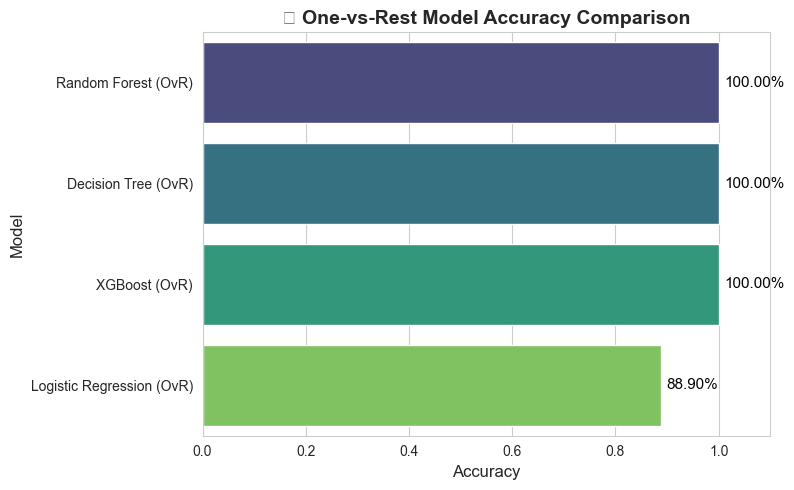

✅ Grafik saqlandi: C:\Users\Rasulbek907\Desktop\Project_MP\Results\OvR_Accuracy_Results.png


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# 📊 Natijalar jadvali
results_df = pd.DataFrame({
    "Model": [
        "Random Forest (OvR)",
        "Decision Tree (OvR)",
        "Logistic Regression (OvR)",
        "XGBoost (OvR)"
    ],
    "Accuracy": [1.0, 1.0, 0.889, 1.0]
})

# 🔹 Tartiblash (eng yuqori accuracy bo‘yicha)
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# 🎨 Grafik sozlamalari
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

ax = sns.barplot(
    x="Accuracy",
    y="Model",
    data=results_df,
    palette="viridis"
)

# 🔹 Har bir ustun ustiga foiz yozish
for i, (acc, model) in enumerate(zip(results_df["Accuracy"], results_df["Model"])):
    plt.text(acc + 0.01, i, f"{acc:.2%}", va="center", fontsize=11, color="black")

# 🔹 Dizayn
plt.title("📊 One-vs-Rest Model Accuracy Comparison", fontsize=14, weight='bold')
plt.xlabel("Accuracy", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.xlim(0, 1.1)
plt.tight_layout()

# 🔹 PNG fayl sifatida saqlash
save_path = r"C:\Users\Rasulbek907\Desktop\Project_MP\Results\OvR_Accuracy_Results.png"

# Agar papka mavjud bo‘lmasa, yaratadi
os.makedirs(os.path.dirname(save_path), exist_ok=True)

plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Grafik saqlandi: {save_path}")


C:\Users\Rasulbek907\AppData\Local\Temp\ipykernel_4516\1873004613.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
C:\Users\Rasulbek907\AppData\Local\Temp\ipykernel_4516\1873004613.py:40: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Rasulbek907\AppData\Local\Temp\ipykernel_4516\1873004613.py:48: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.savefig(save_path, dpi=300, bbox_inches='tight')
c:\Users\Rasulbek907\Desktop\Project_MP\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


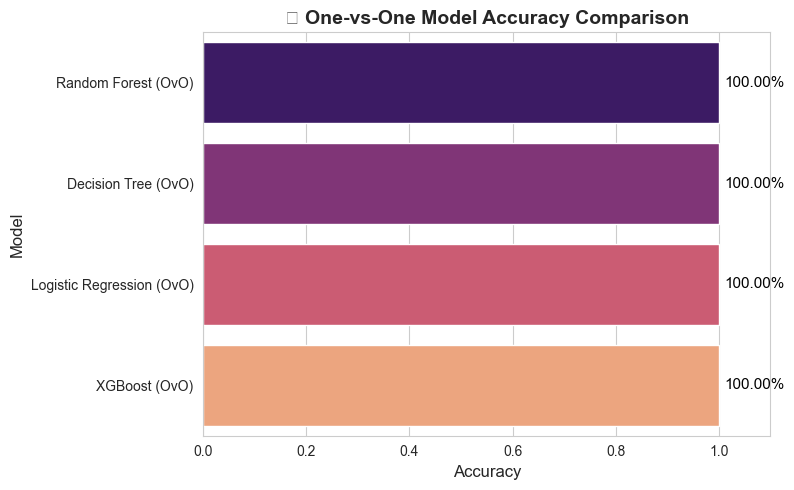

✅ Grafik saqlandi: C:\Users\Rasulbek907\Desktop\Project_MP\Results\OvO_Accuracy_Results.png


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# 📊 One-vs-One natijalar jadvali
results_df = pd.DataFrame({
    "Model": [
        "Random Forest (OvO)",
        "Decision Tree (OvO)",
        "Logistic Regression (OvO)",
        "XGBoost (OvO)"
    ],
    "Accuracy": [1.0, 1.0, 1.0, 1.0]
})

# 🔹 Accuracy bo‘yicha tartiblash
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# 🎨 Grafik sozlamalari
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

ax = sns.barplot(
    x="Accuracy",
    y="Model",
    data=results_df,
    palette="magma"
)

# 🔹 Har bir ustun ustiga foiz yozish
for i, (acc, model) in enumerate(zip(results_df["Accuracy"], results_df["Model"])):
    plt.text(acc + 0.01, i, f"{acc:.2%}", va="center", fontsize=11, color="black")

# 🔹 Dizayn
plt.title("📊 One-vs-One Model Accuracy Comparison", fontsize=14, weight='bold')
plt.xlabel("Accuracy", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.xlim(0, 1.1)
plt.tight_layout()

# 🔹 PNG fayl sifatida saqlash
save_path = r"C:\Users\Rasulbek907\Desktop\Project_MP\Results\OvO_Accuracy_Results.png"

# Agar papka mavjud bo‘lmasa, yaratadi
os.makedirs(os.path.dirname(save_path), exist_ok=True)

plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Grafik saqlandi: {save_path}")
